In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
# pd.set_option('display.max_rows', 50)
import tabula
from pandasql import sqldf
import math
from scipy.stats import chi2
from scipy import stats
from matplotlib import pyplot as plt

In [ ]:
DNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'weighted')
# DNA_inside_uw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_DNAinside.xlsx", sheet_name = 'unweighted')
RNA_inside_w = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'weighted')
# RNA_inside_uw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\integrated_results_RNAinside.xlsx", sheet_name = 'unweighted')
dna_dt = DNA_inside_w.iloc[:135].copy()
rna_dt = RNA_inside_w.iloc[:133].copy()

In [ ]:
dna_pw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\DNA_gene_lists.xlsx")
rna_pw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\soyNet_results\dt_genes_fromPW\RNA_gene_lists.xlsx")

In [ ]:
print('overlapped:', len(set(dna_pw['gene']) & set(rna_pw['gene'])))
print('union:', len(set(dna_pw['gene']) | set(rna_pw['gene'])))

In [8]:
## validation
# inner_cirle & dtgenes
# two circles & dtgenes
# intermediate genes
# remaining genes

In [ ]:
pw_results = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\DNA_hypergeom_results.xlsx")
pw_results_swap = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\RNA_hypergeom_results.xlsx")

In [ ]:
pw_bonf = pw_results[pw_results['p_Bonf'] < 0.005].reset_index().drop(['index'], axis = 1)
pw_swap_bonf = pw_results_swap[pw_results_swap['p_Bonf'] < 0.005].reset_index().drop(['index'], axis = 1)

In [ ]:
set(pw_swap_bonf['Pathway']) & set(pw_bonf['Pathway'])

In [ ]:
len(set(pw_swap_bonf['Pathway']) & set(pw_bonf['Pathway']))

##### DNA inside

In [ ]:
DNA_nw = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\DNA_inside_network24_node.csv")
len(DNA_nw)

In [ ]:
dna_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\dna_genes_id.xlsx", sheet_name = 'inner')
dna_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\dna_genes_id.xlsx", sheet_name = 'outer')

In [5]:
# dna_list_in['gene_fv'] = dna_list_in['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
# dna_list_out['gene_fv'] = dna_list_out['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())

# DNA_nw_inner = DNA_nw[DNA_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
# DNA_nw_outer = DNA_nw[(DNA_nw['gene'].isin(DNA_nw_inner['gene']) == False) & (DNA_nw['degree.layout'] != 0)].reset_index().drop(['index'], axis = 1)

# DNA_nw_inner = DNA_nw_inner.merge(dna_list_in, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
# DNA_nw_inner.loc[(DNA_nw_inner['gene_fv'].isna()), 'gene_fv'] = DNA_nw_inner['gene']

# DNA_nw_outer = DNA_nw_outer.merge(dna_list_out, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
# DNA_nw_outer.loc[(DNA_nw_outer['gene_fv'].isna()), 'gene_fv'] = DNA_nw_outer['gene']

# DNA_nw = pd.concat([DNA_nw_inner, DNA_nw_outer]).reset_index().drop(['index'], axis = 1)

In [ ]:
def transfer(cytoscape_list, inner_map, outer_map):
    inner_map['gene_fv'] = inner_map['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
    outer_map['gene_fv'] = outer_map['gene_id'].apply(lambda x : x.replace('_', '.').lower().capitalize())
    gene_inner = cytoscape_list[cytoscape_list['selected'] == True].reset_index().drop(['index'], axis = 1)
    gene_outer = cytoscape_list[(cytoscape_list['gene'].isin(gene_inner['gene']) == False) & (cytoscape_list['degree.layout'] != 0)].reset_index().drop(['index'], axis = 1)
    gene_inner = gene_inner.merge(inner_map, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
    gene_outer = gene_outer.merge(outer_map, left_on = ['shared name'], right_on = ['gene_name'], how = 'left').drop(['gene_name', 'gene_id'], axis = 1)
    gene_inner.loc[(gene_inner['gene_fv'].isna()), 'gene_fv'] = gene_inner['gene']
    gene_outer.loc[(gene_outer['gene_fv'].isna()), 'gene_fv'] = gene_outer['gene']
    gene_nw = pd.concat([gene_inner, gene_outer]).reset_index().drop(['index'], axis = 1)
    return gene_nw

In [ ]:
DNA_nw = transfer(DNA_nw, dna_list_in, dna_list_out)

In [ ]:
dna_inner_dt = set(DNA_nw[DNA_nw['selected'] == True].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(dna_dt['gene'])
dna_all_dt = set(DNA_nw['gene_fv']) & set(dna_dt['gene'])
dna_inter = set(DNA_nw['gene_fv']) - set(dna_dt['gene'])
dna_outer_dt = set(DNA_nw[DNA_nw['selected'] == False].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(dna_dt['gene'])
len(dna_inner_dt), len(dna_all_dt), len(dna_inter), len(dna_outer_dt)

##### DNA inside pw

In [19]:
DNA_nwpw = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\DNA_inside_PWnetwork_fv.csv")
len(DNA_nwpw)

136

In [20]:
dnapw_list_in = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\dnapw_genes_id.xlsx", sheet_name = 'inner')
dnapw_list_out = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\dnapw_genes_id.xlsx", sheet_name = 'outer')

In [21]:
DNA_nwpw = transfer(cytoscape_list = DNA_nwpw, inner_map = dnapw_list_in, outer_map = dnapw_list_out)

In [27]:
# DNA_nwpw.to_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\DNA_inside_PWnetwork_FV1.xlsx", index = False)

In [120]:
dnapw_inner_dt = set(DNA_nwpw[DNA_nwpw['selected'] == True].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(dna_dt['gene'])
dnapw_all_dt = set(DNA_nwpw['gene_fv']) & set(dna_dt['gene'])
dnapw_inter = set(DNA_nwpw['gene_fv']) - set(dna_dt['gene'])
dnapw_outer_dt = set(DNA_nwpw[DNA_nwpw['selected'] == False].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(dna_dt['gene'])
len(dnapw_inner_dt), len(dnapw_all_dt), len(dnapw_inter), len(dnapw_outer_dt)

(18, 72, 25, 54)

##### RNA inside

In [23]:
RNA_nw = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\RNA_inside_network_fv.csv")
len(RNA_nw)

156

In [24]:
rna_nw_inner = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\rna_genes_id.xlsx", sheet_name = 'inner')
rna_nw_outer = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\rna_genes_id.xlsx", sheet_name = 'outer')

In [25]:
RNA_nw = transfer(RNA_nw, rna_nw_inner, rna_nw_outer)

In [32]:
# RNA_nw.to_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\RNA_inside_network_FV1.xlsx", index = False)

In [122]:
rna_inner_dt = set(RNA_nw[RNA_nw['selected'] == True].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(rna_dt['gene'])
rna_all_dt = set(RNA_nw['gene_fv']) & set(rna_dt['gene'])
rna_inter = set(RNA_nw['gene_fv']) - set(rna_dt['gene'])
rna_outer_dt = set(RNA_nw[RNA_nw['selected'] == False].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(rna_dt['gene'])
len(rna_inner_dt), len(rna_all_dt), len(rna_inter), len(rna_outer_dt)

(15, 86, 27, 71)

##### RNA inside pw

In [27]:
RNA_nwpw = pd.read_csv(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\RNA_inside_PWnetwork.csv")
len(RNA_nwpw)

135

In [28]:
rnapw_nw_inner = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\rnapw_genes_id.xlsx", sheet_name = 'inner')
rnapw_nw_outer = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\rnapw_genes_id.xlsx", sheet_name = 'outer')

In [29]:
RNA_nwpw = transfer(RNA_nwpw, rnapw_nw_inner, rnapw_nw_outer)

In [123]:
rnapw_inner_dt = set(RNA_nwpw[RNA_nwpw['selected'] == True].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(rna_dt['gene'])
rnapw_all_dt = set(RNA_nwpw['gene_fv']) & set(rna_dt['gene'])
rnapw_inter = set(RNA_nwpw['gene_fv']) - set(rna_dt['gene'])
rnapw_outer_dt = set(RNA_nwpw[RNA_nwpw['selected'] == False].reset_index().drop(['index'], axis = 1)['gene_fv']) & set(rna_dt['gene'])
len(rnapw_inner_dt), len(rnapw_all_dt), len(rnapw_inter), len(rnapw_outer_dt)

(14, 72, 27, 58)

#### integration

In [92]:
dna_nw = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_inside24\DNA_inside_network_FV1.xlsx')
dnapw_nw = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\DNA_insidePW\DNA_inside_PWnetwork_FV1.xlsx')
rna_nw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_inside\RNA_inside_network_FV1.xlsx")
rnapw_nw = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\RNA_insidePW\RNA_inside_PWnetwork_FV1.xlsx")
len(dna_nw), len(dnapw_nw), len(rna_nw), len(rnapw_nw)

(121, 98, 114, 100)

DNA_inside

In [41]:
dna_nw_inner = dna_nw[dna_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
dna_nw_outer = dna_nw[dna_nw['selected'] == False].reset_index().drop(['index'], axis = 1)
len(dna_nw_inner), len(dna_nw_outer)

(24, 97)

In [52]:
dna_nw_dt = list(set(dna_nw_inner['gene_fv']) & set(dna_dt['gene']))
print('dna inside No.DTgenes:', len(dna_nw_dt))

dna inside No.DTgenes: 14


dna_inside pw

In [57]:
dnapw_nw_inner = dnapw_nw[dnapw_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
len(dnapw_nw_inner)

35

In [53]:
dnapw_nw_dt = list(set(dnapw_nw_inner['gene_fv']) & set(dna_dt['gene']))
print('dna pw inside No.DTgenes:', len(dnapw_nw_dt))

dna pw inside No.DTgenes: 18


dna summarization

In [54]:
dna_union = list(set(dna_nw_dt) | set(dnapw_nw_dt))
print('dna union', len(dna_union))

dna union 19


In [99]:
dna_overlap = list(set(dna_nw_dt) & set(dnapw_nw_dt))
print('dna overlap', len(dna_overlap))

dna overlap 13


In [101]:
dna_summary = pd.DataFrame()
dna_summary['Union_DNA'] = dna_union
dna_summary['dna_DTgenes'] = dna_nw_dt + [np.nan for i in range(len(dna_union) - len(dna_nw_dt))]
dna_summary['dnapw_DTgenes'] = dnapw_nw_dt + [np.nan for i in range(len(dna_union) - len(dnapw_nw_dt))]
dna_summary['overlapped_DNA'] = dna_overlap + [np.nan for i in range(len(dna_union) - len(dna_overlap))]

In [103]:
# dna_summary.to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\dna_DTgenes.xlsx', index = False)。

RNA_inside

In [58]:
rna_nw_inner = rna_nw[rna_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
len(rna_nw_inner)

30

In [59]:
rna_nw_dt = list(set(rna_nw_inner['gene_fv']) & set(rna_dt['gene']))
print('rna inside No.DTgenes:', len(rna_nw_dt))

rna inside No.DTgenes: 15


RNA_inside pw

In [60]:
rnapw_nw_inner = rnapw_nw[rnapw_nw['selected'] == True].reset_index().drop(['index'], axis = 1)
len(rnapw_nw_inner)

27

In [72]:
rnapw_nw_dt = list(set(rnapw_nw_inner['gene_fv']) & set(rna_dt['gene']))
print('rna pw inside No.DTgenes:', len(rnapw_nw_dt))

rna pw inside No.DTgenes: 14


RNA summarization

In [79]:
rna_union = list(set(rnapw_nw_dt) | set(rna_nw_dt))
print('rna union', len(rna_union))

rna union 16


In [97]:
rna_overlap = list(set(rnapw_nw_dt) & set(rna_nw_dt))
print('rna overlap', len(rna_overlap))

rna overlap 13


In [104]:
rna_summary = pd.DataFrame()
rna_summary['Union_RNA'] = rna_union
rna_summary['rna_DTgenes'] = rna_nw_dt + [np.nan for i in range(len(rna_union) - len(rna_nw_dt))]
rna_summary['rnapw_DTgenes'] = rnapw_nw_dt + [np.nan for i in range(len(rna_union) - len(rnapw_nw_dt))]
rna_summary['overlapped_RNA'] = rna_overlap + [np.nan for i in range(len(rna_union) - len(rna_overlap))]

In [106]:
# rna_summary.to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\rna_DTgenes.xlsx', index = False)

outer DTgenes in 4 networks

In [129]:
all_outer_dt = set(list(dna_outer_dt) + list(dnapw_outer_dt) + list(rna_outer_dt) + list(rnapw_outer_dt))
len(all_outer_dt)

107

overall summary

In [88]:
# DNA_U & RNA_U
print('total overlapped genes:', len(set(dna_union) & set(rna_union)))

total overlapped genes: 7


In [89]:
# DNA_U | RNA_U
print('total union genes:', len(set(dna_union) | set(rna_union)))

total union genes: 28


In [98]:
# DNA_overlap & RNA_overlap
len(set(rna_overlap) & set(dna_overlap))

4

In [100]:
print('Union of dna overlap and rna overlap:', len(set(dna_overlap) | set(rna_overlap)))
print('Intersetion of dna overlap and rna overlap:', len(set(dna_overlap) & set(rna_overlap)))

Union of dna overlap and rna overlap: 22
Intersetion of dna overlap and rna overlap: 4


In [107]:
summary = pd.DataFrame()
summary['Union_dnaU_rnaU'] = list(set(dna_union) | set(rna_union))
summary['Overlapped_dnaU_rnaU'] = list(set(dna_union) & set(rna_union)) + [np.nan for i in range(len(list(set(dna_union) | set(rna_union))) - len(list(set(dna_union) & set(rna_union))))]

In [109]:
# summary.to_excel(r'C:\Users\edwar\Desktop\農藝\paper2\sys_biology\cytoscape\summary_DTgenes.xlsx', index = False)

## validation

### unswap (DNA_inside) dna_inner_dt, dna_all_dt, dna_inter / dnapw_inner_dt, dnapw_all_dt, dnapw_inter

In [33]:
# RNA
shin_2015 = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\gene expression\Shin-2015\Shin2015_wgd.xlsx')
tamang_2021 = pd.read_excel(r'C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\gene expression\Tamang-2021\Tamang2021_wgd.xlsx')

glyma_gene_ver = pd.read_csv(r'C:\Users\edwar\Desktop\農藝\paper2\Glyma_genes_correspondence_final.txt', delimiter = '\t')

In [34]:
shin_2015_6h = shin_2015[shin_2015['drought_treatment_span'] == 6].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})
shin_2015_12h = shin_2015[shin_2015['drought_treatment_span'] == 12].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})
shin_2015_24h = shin_2015[shin_2015['drought_treatment_span'] == 24].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'fc']].rename(columns = {'mapped_gene':'gene_org'})

shin_2015_6h = shin_2015_6h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})
shin_2015_12h = shin_2015_12h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})
shin_2015_24h = shin_2015_24h.merge(glyma_gene_ver, left_on = ['gene_org'], right_on = ['Wm82.a1.v1'], how = 'left').drop(['Wm82.a1.v1', 'Wm82.a1.v1.1'], axis = 1).rename(columns = {'Wm82.a2.v1':'gene'})

shin_2015_6h = shin_2015_6h[shin_2015_6h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)
shin_2015_12h = shin_2015_12h[shin_2015_12h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)
shin_2015_24h = shin_2015_24h[shin_2015_24h['gene'].isna() == False].reset_index().drop(['index'], axis = 1)

shin_2015_6h.loc[(shin_2015_6h['fc'] < 1), 'fc'] = 1 / shin_2015_6h['fc']
shin_2015_12h.loc[(shin_2015_12h['fc'] < 1), 'fc'] = 1 / shin_2015_12h['fc']
shin_2015_24h.loc[(shin_2015_24h['fc'] < 1), 'fc'] = 1 / shin_2015_24h['fc']

shin_2015_6h['p_val'] = 0.1 ** np.log2(shin_2015_6h['fc'])
shin_2015_12h['p_val'] = 0.1 ** np.log2(shin_2015_12h['fc'])
shin_2015_24h['p_val'] = 0.1 ** np.log2(shin_2015_24h['fc'])

shin_2015_6h['-logP'] = -np.log10(shin_2015_6h['p_val'])
shin_2015_12h['-logP'] = -np.log10(shin_2015_12h['p_val'])
shin_2015_24h['-logP'] = -np.log10(shin_2015_24h['p_val'])

In [35]:
tamang_2021_5d = tamang_2021[tamang_2021['drought_treatment_span'] == 120].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'p', 'fc']].reset_index().drop(['index'], axis = 1).rename(columns = {'mapped_gene':'gene'})
tamang_2021_7d = tamang_2021[tamang_2021['drought_treatment_span'] == 144].reset_index().drop(['index'], axis = 1)[['mapped_gene', 'p', 'fc']].reset_index().drop(['index'], axis = 1).rename(columns = {'mapped_gene':'gene'})
tamang_2021_5d = tamang_2021_5d[tamang_2021_5d['fc'].isna() == False].reset_index().drop(['index'], axis = 1)
tamang_2021_7d = tamang_2021_7d[tamang_2021_7d['fc'].isna() == False].reset_index().drop(['index'], axis = 1)

tamang_2021_5d.loc[(tamang_2021_5d['fc'] < 1), 'fc'] = 1 / tamang_2021_5d['fc']
tamang_2021_7d.loc[(tamang_2021_7d['fc'] < 1), 'fc'] = 1 / tamang_2021_7d['fc']

tamang_2021_5d['p_val'] = 0.1 ** np.log2(tamang_2021_5d['fc'])
tamang_2021_7d['p_val'] = 0.1 ** np.log2(tamang_2021_7d['fc'])

tamang_2021_5d['-logP'] = -np.log10(tamang_2021_5d['p_val'])
tamang_2021_7d['-logP'] = -np.log10(tamang_2021_7d['p_val'])

dna

In [42]:
# 6h
p_inner_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dna_inner_dt)]['-logP'], shin_2015_6h['-logP'], 'greater')
p_all_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dna_all_dt)]['-logP'], shin_2015_6h['-logP'], 'greater')
p_inter_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dna_inter)]['-logP'], shin_2015_6h['-logP'], 'greater')
print('inner DTgenes:', p_inner_6h)
print('all DTgenes:', p_all_6h)
print('intermediate genes:', p_inter_6h)

inner DTgenes: RanksumsResult(statistic=1.4540022579904386, pvalue=0.07297284008768239)
all DTgenes: RanksumsResult(statistic=6.283683341326315, pvalue=1.653219265359191e-10)
intermediate genes: RanksumsResult(statistic=1.4989471826697292, pvalue=0.06694366733997151)


In [43]:
# 12h
p_inner_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dna_inner_dt)]['-logP'], shin_2015_12h['-logP'], 'greater')
p_all_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dna_all_dt)]['-logP'], shin_2015_12h['-logP'], 'greater')
p_inter_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dna_inter)]['-logP'], shin_2015_12h['-logP'], 'greater')
print('inner DTgenes:', p_inner_12h)
print('all DTgenes:', p_all_12h)
print('intermediate genes:', p_inter_12h)

inner DTgenes: RanksumsResult(statistic=2.353919856889006, pvalue=0.009288307873214512)
all DTgenes: RanksumsResult(statistic=7.730459706837893, pvalue=5.357945237658638e-15)
intermediate genes: RanksumsResult(statistic=2.160563216999108, pvalue=0.015364547680936553)


In [44]:
# 24h
p_inner_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dna_inner_dt)]['-logP'], shin_2015_24h['-logP'], 'greater')
p_all_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dna_all_dt)]['-logP'], shin_2015_24h['-logP'], 'greater')
p_inter_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dna_inter)]['-logP'], shin_2015_24h['-logP'], 'greater')
print('inner DTgenes:', p_inner_24h)
print('all DTgenes:', p_all_24h)
print('intermediate genes:', p_inter_24h)

inner DTgenes: RanksumsResult(statistic=1.3768270122831427, pvalue=0.0842828686288607)
all DTgenes: RanksumsResult(statistic=5.674891103639842, pvalue=6.938845389919216e-09)
intermediate genes: RanksumsResult(statistic=0.9832331431479349, pvalue=0.16274635314398972)


In [46]:
# 5d
p_inner_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dna_inner_dt)]['-logP'], tamang_2021_5d['-logP'], 'greater')
p_all_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dna_all_dt)]['-logP'], tamang_2021_5d['-logP'], 'greater')
p_inter_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dna_inter)]['-logP'], tamang_2021_5d['-logP'], 'greater')
print('inner DTgenes:', p_inner_5d)
print('all DTgenes:', p_all_5d)
print('intermediate genes:', p_inter_5d)

inner DTgenes: RanksumsResult(statistic=1.413829874587369, pvalue=0.07870592984543362)
all DTgenes: RanksumsResult(statistic=6.969820523625478, pvalue=1.5867278566522455e-12)
intermediate genes: RanksumsResult(statistic=0.9193668121872337, pvalue=0.17895187110233807)


In [47]:
# 7d
p_inner_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dna_inner_dt)]['-logP'], tamang_2021_7d['-logP'], 'greater')
p_all_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dna_all_dt)]['-logP'], tamang_2021_7d['-logP'], 'greater')
p_inter_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dna_inter)]['-logP'], tamang_2021_7d['-logP'], 'greater')
print('inner DTgenes:', p_inner_7d)
print('all DTgenes:', p_all_7d)
print('intermediate genes:', p_inter_7d)

inner DTgenes: RanksumsResult(statistic=1.2146921188083042, pvalue=0.1122417697766761)
all DTgenes: RanksumsResult(statistic=6.136743610941887, pvalue=4.211507971872905e-10)
intermediate genes: RanksumsResult(statistic=-0.09698013593080032, pvalue=0.5386289153439138)


dnapw

In [55]:
# 6h
from scipy.stats import ranksums
p_pw_inner_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dnapw_inner_dt)]['-logP'], shin_2015_6h['-logP'], 'greater')
p_pw_all_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dnapw_all_dt)]['-logP'], shin_2015_6h['-logP'], 'greater')
p_pw_inter_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(dnapw_inter)]['-logP'], shin_2015_6h['-logP'], 'greater')
print('inner DTgenes:', p_pw_inner_6h)
print('all DTgenes:', p_pw_all_6h)
print('intermediate genes:', p_pw_inter_6h)

inner DTgenes: RanksumsResult(statistic=2.4720680601930423, pvalue=0.006716696945053399)
all DTgenes: RanksumsResult(statistic=6.062384528586278, pvalue=6.705904651181025e-10)
intermediate genes: RanksumsResult(statistic=2.0403081489172403, pvalue=0.020659821845569252)


In [56]:
# 12h
from scipy.stats import ranksums
p_pw_inner_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dnapw_inner_dt)]['-logP'], shin_2015_12h['-logP'], 'greater')
p_pw_all_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dnapw_all_dt)]['-logP'], shin_2015_12h['-logP'], 'greater')
p_pw_inter_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(dnapw_inter)]['-logP'], shin_2015_12h['-logP'], 'greater')
print('inner DTgenes:', p_pw_inner_12h)
print('all DTgenes:', p_pw_all_12h)
print('intermediate genes:', p_pw_inter_12h)

inner DTgenes: RanksumsResult(statistic=2.91491717039213, pvalue=0.0017789147751104382)
all DTgenes: RanksumsResult(statistic=7.261521667252509, pvalue=1.9137983728689335e-13)
intermediate genes: RanksumsResult(statistic=2.5035881233668573, pvalue=0.00614705300162438)


In [57]:
# 24h
from scipy.stats import ranksums
p_pw_inner_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dnapw_inner_dt)]['-logP'], shin_2015_24h['-logP'], 'greater')
p_pw_all_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dnapw_all_dt)]['-logP'], shin_2015_24h['-logP'], 'greater')
p_pw_inter_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(dnapw_inter)]['-logP'], shin_2015_24h['-logP'], 'greater')
print('inner DTgenes:', p_pw_inner_24h)
print('all DTgenes:', p_pw_all_24h)
print('intermediate genes:', p_pw_inter_24h)

inner DTgenes: RanksumsResult(statistic=1.7372284298756058, pvalue=0.04117342931733234)
all DTgenes: RanksumsResult(statistic=4.810521566730852, pvalue=7.526847932885243e-07)
intermediate genes: RanksumsResult(statistic=1.0835342886408563, pvalue=0.13928566993442243)


In [58]:
# 5d
p_pw_inner_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dnapw_inner_dt)]['-logP'], tamang_2021_5d['-logP'], 'greater')
p_pw_all_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dnapw_all_dt)]['-logP'], tamang_2021_5d['-logP'], 'greater')
p_pw_inter_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(dnapw_inter)]['-logP'], tamang_2021_5d['-logP'], 'greater')
print('inner DTgenes:', p_pw_inner_5d)
print('all DTgenes:', p_pw_all_5d)
print('intermediate genes:', p_pw_inter_5d)

inner DTgenes: RanksumsResult(statistic=1.9832182454910199, pvalue=0.02367152836306738)
all DTgenes: RanksumsResult(statistic=6.152047884752183, pvalue=3.824438719860722e-10)
intermediate genes: RanksumsResult(statistic=0.4540842764989781, pvalue=0.32488408491178883)


In [59]:
# 7d
p_pw_inner_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dnapw_inner_dt)]['-logP'], tamang_2021_7d['-logP'], 'greater')
p_pw_all_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dnapw_all_dt)]['-logP'], tamang_2021_7d['-logP'], 'greater')
p_pw_inter_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(dnapw_inter)]['-logP'], tamang_2021_7d['-logP'], 'greater')
print('inner DTgenes:', p_pw_inner_7d)
print('all DTgenes:', p_pw_all_7d)
print('intermediate genes:', p_pw_inter_7d)

inner DTgenes: RanksumsResult(statistic=1.2850977198827203, pvalue=0.09937906913531996)
all DTgenes: RanksumsResult(statistic=5.199396198537669, pvalue=9.996847195149822e-08)
intermediate genes: RanksumsResult(statistic=-0.37719269051960863, pvalue=0.6469847940308037)


### swap (RNA_inside)

In [36]:
val_data = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\data collection\whole genome data\complete\GWAS\Saleem-2022\saleem2022_integration_v1.xlsx")
val_data['-logP_SD'] = -np.log10(val_data['p_SD'])
val_data['-logP_LD'] = -np.log10(val_data['p_LD'])
val_data_v1 = val_data[['gene', '-logP_SD', '-logP_LD']]

In [49]:
val_data.head()

,gene,p_SD,p_LD,p_val,sig_flag,nonsig_flag,score_raw,-logP_SD,-logP_LD
0,Glyma.01g000100,0.088000,0.066671,0.036014,0,2,1.443523,1.055517,1.176061
1,Glyma.01g000200,0.088000,0.045717,0.026213,1,1,1.581482,1.055517,1.339926
2,Glyma.01g000300,0.364076,0.045717,0.084814,1,1,1.071532,0.438808,1.339926
3,Glyma.01g000400,0.001046,0.022245,0.000271,2,0,3.566280,2.980526,1.652771
4,Glyma.01g000500,0.001046,0.022245,0.000271,2,0,3.566280,2.980526,1.652771


rna

In [52]:
# short
p_inner_s = ranksums(val_data[val_data['gene'].isin(rna_inner_dt)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
p_all_s = ranksums(val_data[val_data['gene'].isin(rna_all_dt)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
p_inter_s = ranksums(val_data[val_data['gene'].isin(rna_inter)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
print('inner DTgenes:', p_inner_s)
print('all DTgenes:', p_all_s)
print('intermediate genes:', p_inter_s)

inner DTgenes: 0.04362969100396669
all DTgenes: 0.009447717669760745
intermediate genes: 0.08458548330972693


In [54]:
# long
p_inner_l = ranksums(val_data[val_data['gene'].isin(rna_inner_dt)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
p_all_l = ranksums(val_data[val_data['gene'].isin(rna_all_dt)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
p_inter_l = ranksums(val_data[val_data['gene'].isin(rna_inter)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
print('inner DTgenes:', p_inner_l)
print('all DTgenes:', p_all_l)
print('intermediate genes:', p_inter_l)

inner DTgenes: 0.0327400424345162
all DTgenes: 0.015197734669992738
intermediate genes: 0.5718848287753369


rna pw

In [61]:
# short
p_pw_inner_s = ranksums(val_data[val_data['gene'].isin(rnapw_inner_dt)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
p_pw_all_s = ranksums(val_data[val_data['gene'].isin(rnapw_all_dt)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
p_pw_inter_s = ranksums(val_data[val_data['gene'].isin(rnapw_inter)]['-logP_SD'], val_data['-logP_SD'], 'greater')[1]
print('inner DTgenes:', p_pw_inner_s)
print('all DTgenes:', p_pw_all_s)
print('intermediate genes:', p_pw_inter_s)

inner DTgenes: 0.09734282579035142
all DTgenes: 0.02767715212985398
intermediate genes: 0.2671966024173458


In [62]:
# long
p_pw_inner_l = ranksums(val_data[val_data['gene'].isin(rnapw_inner_dt)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
p_pw_all_l = ranksums(val_data[val_data['gene'].isin(rnapw_all_dt)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
p_pw_inter_l = ranksums(val_data[val_data['gene'].isin(rnapw_inter)]['-logP_LD'], val_data['-logP_LD'], 'greater')[1]
print('inner DTgenes:', p_pw_inner_l)
print('all DTgenes:', p_pw_all_l)
print('intermediate genes:', p_pw_inter_l)

inner DTgenes: 0.06157318802846702
all DTgenes: 0.05252950054346674
intermediate genes: 0.7812203832326514


### Union genes

In [68]:
union_genes = pd.read_excel(r"C:\Users\edwar\Desktop\農藝\paper2\sys_biology\sysBio_results_summary_formal.xlsx", sheet_name = 'key_genes')

In [85]:
union_genes.columns = ['union', 'overlap']
key_genes = list(union_genes['union'])
overlap_genes = list(union_genes['overlap'])

###### compared with whole genome

In [74]:
# 28 keygenes validation
p_union_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
p_union_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
p_union_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
p_union_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
p_union_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
print('p-value of union genes: 6h {}, 12h {}, 24h {}, 5d {} ,and 7d {}'.format(p_union_6h, p_union_12h, p_union_24h, p_union_5d, p_union_7d))

p-value of union genes: 6h 0.0007640813447379839, 12h 2.4435834046249826e-05, 24h 0.00019861584877187654, 5d 0.005312258262523946 ,and 7d 0.02971176093806974


In [75]:
# 28 keygenes validation
p_union_short = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
p_union_long = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('DNA database validation, short {} and long {}'.format(p_union_short, p_union_long))

DNA database validation, short 9.927617977595599e-05 and long 0.00012216245011823334


In [95]:
# 8 overlapped genes validation
p_overlap_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(overlap_genes)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
p_overlap_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(overlap_genes)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
p_overlap_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(overlap_genes)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
p_overlap_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(overlap_genes)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
p_overlap_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(overlap_genes)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
print('DNA database validation, p-value of overlapped genes: 6h {}, 12h {}, 24h {}, 5d {}, and 7d {}'.format(p_overlap_6h, p_overlap_12h, p_overlap_24h, p_overlap_5d, p_overlap_7d))

DNA database validation, p-value of overlapped genes: 6h 0.0029598636218384606, 12h 0.0033743808742076778, 24h 0.024633889504836345, 5d 0.03654308298871939, and 7d 0.039966968148679886


In [96]:
# 8 overlapped genes validation
p_overlap_short = ranksums(val_data[val_data['gene'].isin(overlap_genes)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
p_overlap_long = ranksums(val_data[val_data['gene'].isin(overlap_genes)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('DNA database validation p-value of overlapped genes: short {} and long {}'.format(p_overlap_short, p_overlap_long))

DNA database validation p-value of overlapped genes: short 0.4196953324813108 and long 0.3265583080553123


In [78]:
all_nw_genes = list(DNA_nw['gene_fv']) + list(DNA_nwpw['gene_fv']) + list(RNA_nw['gene_fv']) + list(RNA_nwpw['gene_fv'])
all_nw_genes = list(set(all_nw_genes))
print('total unique genes in 4 networks: {}'.format(len(all_nw_genes)))

total unique genes in 4 networks: 171


In [83]:
dtgenes_dnarna = set(list(dna_dt['gene']) + list(rna_dt['gene']))
all_inter_genes = set(all_nw_genes) - dtgenes_dnarna
print('total unique intermediate genes in 4 networks:', len(all_inter_genes))

total unique intermediate genes in 4 networks: 45


In [84]:
all_dtgenes_innw = list(set(dtgenes_dnarna) & set(all_nw_genes))
print('total unique DTgenes in 4 networks:', len(all_dtgenes_innw))

total unique DTgenes in 4 networks: 126


In [90]:
# all unique DTgenes in networks validation
p_dtgenes_innw_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(all_dtgenes_innw)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
p_dtgenes_innw_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(all_dtgenes_innw)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
p_dtgenes_innw_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(all_dtgenes_innw)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
p_dtgenes_innw_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(all_dtgenes_innw)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
p_dtgenes_innw_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(all_dtgenes_innw)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
print('p-value of all unique DTgenes in network: 6h {}, 12h {}, 24 {}, 5d {} and 7d {}'.format(p_dtgenes_innw_6h, p_dtgenes_innw_12h, p_dtgenes_innw_24h, p_dtgenes_innw_5d, p_dtgenes_innw_7d))

p-value of all unique DTgenes in network: 6h 1.1606620202496683e-18, 12h 1.544529199382915e-25, 24 1.7493089452974037e-18, 5d 1.4738999673761374e-15 and 7d 6.035874882053862e-13


In [97]:
# all unique DTgenes in networks validation
p_dtgenes_innw_short = ranksums(val_data[val_data['gene'].isin(all_dtgenes_innw)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
p_dtgenes_innw_long = ranksums(val_data[val_data['gene'].isin(all_dtgenes_innw)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('DNA database validation p-value of all unique DTgenes: short {} and long {}'.format(p_dtgenes_innw_short, p_dtgenes_innw_long))

DNA database validation p-value of all unique DTgenes: short 1.72998153260704e-07 and long 4.777971400724239e-07


In [93]:
# all unique intermediate genes in networks validation
p_allinter_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(all_inter_genes)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
p_allinter_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(all_inter_genes)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
p_allinter_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(all_inter_genes)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
p_allinter_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(all_inter_genes)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
p_allinter_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(all_inter_genes)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
print('p-value of all unique intermediate genes in network: 6h {}, 12h {}, 24 {}, 5d {} and 7d {}'.format(p_allinter_6h, p_allinter_12h, p_allinter_24h, p_allinter_5d, p_allinter_7d))

p-value of all unique intermediate genes in network: 6h 0.003997961122322545, 12h 0.0027899410483288047, 24 0.025486730909178256, 5d 0.40586995739069975 and 7d 0.8142601706664636


In [98]:
# all unique intermediate genes in networks validation
p_allinter_short = ranksums(val_data[val_data['gene'].isin(all_inter_genes)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
p_allinter_long = ranksums(val_data[val_data['gene'].isin(all_inter_genes)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('DNA database validation, p-value of all unique intermediate genes: short {} and long {}'.format(p_allinter_short, p_allinter_long))

DNA database validation, p-value of all unique intermediate genes: short 0.5314171081427305 and long 0.9327244892030643


###### sample comparison validation
###### s1: Union genes; s2: all DTgenes in 4 networks; s3: intermediate genes in 4 networks; s4: remaining genes in whole genome
###### s1 vs s2, s1 vs s3, s1 vs s4

In [131]:
# 6h
p_union_alldt_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(all_dtgenes_innw)]['-logP'], alternative = 'greater')[1]
p_union_allinter_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(all_inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_allouter_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h[shin_2015_6h['gene'].isin(list(all_outer_dt))]['-logP'], alternative = 'greater')[1]
p_union_remaining_6h = ranksums(shin_2015_6h[shin_2015_6h['gene'].isin(key_genes)]['-logP'], shin_2015_6h['-logP'], alternative = 'greater')[1]
print('6 hours trt comparison: p-value of key genes compared with all DTgenes {}, outer DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_6h, p_union_allouter_6h, p_union_allinter_6h, p_union_remaining_6h))

6 hours trt comparison: p-value of key genes compared with all DTgenes 0.932823175290504, outer DTgenes 0.9706584860388439, all intermediate genes 0.15458012266865756, and remaining genes 0.0007640813447379839.


In [132]:
# 12h
p_union_alldt_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(all_dtgenes_innw)]['-logP'], alternative = 'greater')[1]
p_union_allouter_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(all_outer_dt)]['-logP'], alternative = 'greater')[1]
p_union_allinter_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h[shin_2015_12h['gene'].isin(all_inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining_12h = ranksums(shin_2015_12h[shin_2015_12h['gene'].isin(key_genes)]['-logP'], shin_2015_12h['-logP'], alternative = 'greater')[1]
print('12 hours trt comparison: p-value of key genes compared with all DTgenes {}, all outer DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_12h, p_union_allouter_12h, p_union_allinter_12h, p_union_remaining_12h))

12 hours trt comparison: p-value of key genes compared with all DTgenes 0.9512880906905451, all outer DTgenes 0.9863630537256822, all intermediate genes 0.07543115829094191, and remaining genes 2.4435834046249826e-05.


In [136]:
# 24h
p_union_alldt_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(all_dtgenes_innw)]['-logP'], alternative = 'greater')[1]
p_union_allouter_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(all_outer_dt)]['-logP'], alternative = 'greater')[1]
p_union_allinter_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h[shin_2015_24h['gene'].isin(all_inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining_24h = ranksums(shin_2015_24h[shin_2015_24h['gene'].isin(key_genes)]['-logP'], shin_2015_24h['-logP'], alternative = 'greater')[1]
print('24 hours trt comparison: p-value of key genes compared with all DTgenes {}, all outer DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_24h, p_union_allouter_24h, p_union_allinter_24h, p_union_remaining_24h))

24 hours trt comparison: p-value of key genes compared with all DTgenes 0.8758138149129526, all outer DTgenes 0.9415339840149494, all intermediate genes 0.04792505959609199, and remaining genes 0.00019861584877187654.


In [109]:
# 5D
p_union_alldt_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d[tamang_2021_5d['gene'].isin(all_dtgenes_innw)]['-logP'], alternative = 'greater')[1]
p_union_allinter_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d[tamang_2021_5d['gene'].isin(all_inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining_5d = ranksums(tamang_2021_5d[tamang_2021_5d['gene'].isin(key_genes)]['-logP'], tamang_2021_5d['-logP'], alternative = 'greater')[1]
print('5 days trt comparison: p-value of key genes compared with all DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_5d, p_union_allinter_5d, p_union_remaining_5d))

5 days trt comparison: p-value of key genes compared with all DTgenes 0.9324573975950288, all intermediate genes 0.003424865406886619, and remaining genes 0.005312258262523946.


In [110]:
# 7D
p_union_alldt_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d[tamang_2021_7d['gene'].isin(all_dtgenes_innw)]['-logP'], alternative = 'greater')[1]
p_union_allinter_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d[tamang_2021_7d['gene'].isin(all_inter_genes)]['-logP'], alternative = 'greater')[1]
p_union_remaining_7d = ranksums(tamang_2021_7d[tamang_2021_7d['gene'].isin(key_genes)]['-logP'], tamang_2021_7d['-logP'], alternative = 'greater')[1]
print('7 days trt comparison: p-value of key genes compared with all DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_7d, p_union_allinter_7d, p_union_remaining_7d))

7 days trt comparison: p-value of key genes compared with all DTgenes 0.9704763848706586, all intermediate genes 0.007047354106573594, and remaining genes 0.02971176093806974.


In [116]:
# short: 3~4 weeks
p_union_alldt_4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data[val_data['gene'].isin(all_dtgenes_innw)]['-logP_SD'], alternative = 'greater')[1]
p_union_allinter_4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data[val_data['gene'].isin(all_inter_genes)]['-logP_SD'], alternative = 'greater')[1]
p_union_remaining_4w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_SD'], val_data['-logP_SD'], alternative = 'greater')[1]
print('3~4 weeks trt comparison: p-value of key genes compared with all DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_4w, p_union_allinter_4w, p_union_remaining_4w))

3~4 weeks trt comparison: p-value of key genes compared with all DTgenes 0.11126857757681818, all intermediate genes 0.001561950616521565, and remaining genes 9.927617977595599e-05.


In [117]:
# long: 6~7 weeks
p_union_alldt_7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data[val_data['gene'].isin(all_dtgenes_innw)]['-logP_LD'], alternative = 'greater')[1]
p_union_allinter_7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data[val_data['gene'].isin(all_inter_genes)]['-logP_LD'], alternative = 'greater')[1]
p_union_remaining_7w = ranksums(val_data[val_data['gene'].isin(key_genes)]['-logP_LD'], val_data['-logP_LD'], alternative = 'greater')[1]
print('6~7 weeks trt comparison: p-value of key genes compared with all DTgenes {}, all intermediate genes {}, and remaining genes {}.'.format(p_union_alldt_7w, p_union_allinter_7w, p_union_remaining_7w))

6~7 weeks trt comparison: p-value of key genes compared with all DTgenes 0.14149340964795915, all intermediate genes 3.0756884365871145e-05, and remaining genes 0.00012216245011823334.


###### sample comparison validation
###### s1: Union genes; s2: outer DTgenes in 4 networks; s3: intermediate genes in 4 networks; s4: remaining genes in whole genome
###### s1 vs s2, s1 vs s3, s1 vs s4

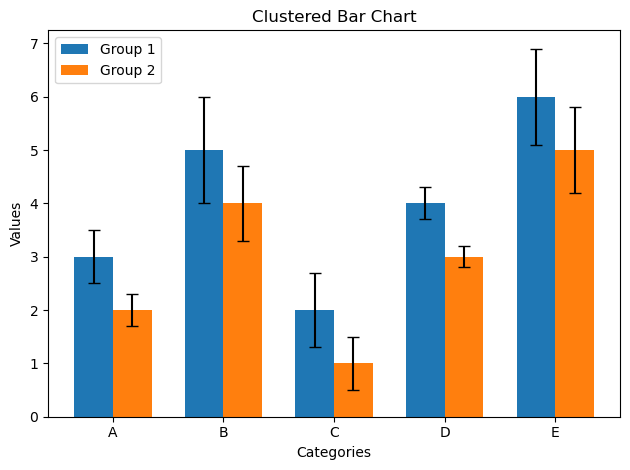

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the first group
data1 = [3, 5, 2, 4, 6]
errors1 = [0.5, 1, 0.7, 0.3, 0.9]
labels1 = ['A', 'B', 'C', 'D', 'E']

# Data for the second group
data2 = [2, 4, 1, 3, 5]
errors2 = [0.3, 0.7, 0.5, 0.2, 0.8]
labels2 = ['F', 'G', 'H', 'I', 'J']

# Calculate the positions for the bars in each group
x = np.arange(len(labels1))
width = 0.35

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the first group
rects1 = ax.bar(x - width/2, data1, width, yerr=errors1, capsize=4, label='Group 1')

# Plot the second group
rects2 = ax.bar(x + width/2, data2, width, yerr=errors2, capsize=4, label='Group 2')

# Set the axis labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Clustered Bar Chart')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels1)

# Add a legend
ax.legend()

# Show the bar chart
plt.tight_layout()
plt.show()

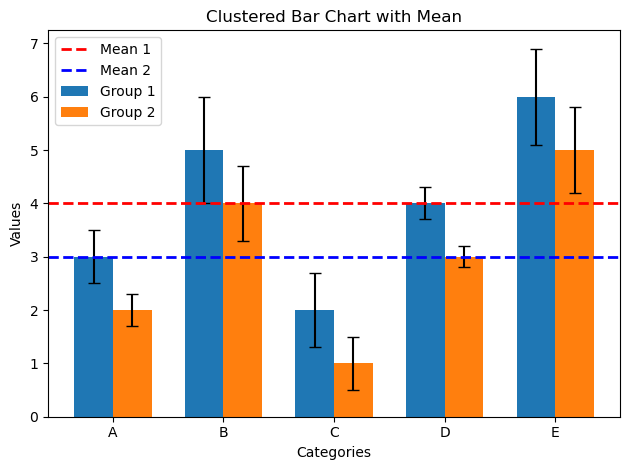

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the first group
data1 = [3, 5, 2, 4, 6]
errors1 = [0.5, 1, 0.7, 0.3, 0.9]
labels1 = ['A', 'B', 'C', 'D', 'E']

# Data for the second group
data2 = [2, 4, 1, 3, 5]
errors2 = [0.3, 0.7, 0.5, 0.2, 0.8]
labels2 = ['F', 'G', 'H', 'I', 'J']

# Calculate the positions for the bars in each group
x = np.arange(len(labels1))
width = 0.35

# Calculate the mean values for each group
mean1 = np.mean(data1)
mean2 = np.mean(data2)

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the first group
rects1 = ax.bar(x - width/2, data1, width, yerr=errors1, capsize=4, label='Group 1')

# Plot the second group
rects2 = ax.bar(x + width/2, data2, width, yerr=errors2, capsize=4, label='Group 2')

# Add horizontal lines for the means
ax.axhline(mean1, color='red', linestyle='dashed', linewidth=2, label='Mean 1')
ax.axhline(mean2, color='blue', linestyle='dashed', linewidth=2, label='Mean 2')

# Set the axis labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Clustered Bar Chart with Mean')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(labels1)

# Add a legend
ax.legend()

# Show the bar chart
plt.tight_layout()
plt.show()
